In [296]:
import polars as pl
import altair as alt
from pathlib import Path
import matplotlib.pyplot as plt

In [297]:
data_dir = Path("data")
df = pl.read_parquet(data_dir / "DSU-Dataset.parquet") 

In [298]:
df.head()

Claim ID,Service Date,Recieved Date,Paid Date,Patient ID,Member Age,Gender,Marital Status,Ethnicity,LOB,Network Status,Claim Category,Claim Subcategory,Claim Line,Place of Service,Provider Type,Provider Specialty,ICD10 Code 1,ICD10 Code 2,ICD10 Code 3,ICD10 Code 4,ICD10 Code 5,ICD10 Code 6,ICD10 Code 7,ICD10 Code 8,ICD10 Code 9,ICD10 Code 10,Service Type,Service Code,Modifiers,High Cost Claim
str,date,date,date,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,i64
"""8110afaab1020212f58193e233369c…",2022-01-15,2022-01-17,2022-01-25,"""99f69b741b2784601452afbe7f9083…","""10-19 Yrs Old""","""F""","""Single""","""Caucasian/White""","""SGH""","""IN NETWORK""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""OCCUPATIONAL MEDICINE (PREVENT…",0,null,null,null,null,null,null,null,null,null,"""PROC""","""U0005""",null,null
"""8110afaab1020212f58193e233369c…",2022-01-15,2022-01-17,2022-01-25,"""99f69b741b2784601452afbe7f9083…","""10-19 Yrs Old""","""F""","""Single""","""Caucasian/White""","""SGH""","""IN NETWORK""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""OCCUPATIONAL MEDICINE (PREVENT…",0,null,null,null,null,null,null,null,null,null,"""PROC""","""U0003""",null,null
"""190430199dfa0b3ed46212060301b3…",2022-01-05,2022-01-06,2022-01-10,"""79c25d5d6a0cec975ddcd349f1c431…","""10-19 Yrs Old""","""M""","""Single""","""Caucasian/White""","""NPS""","""ND PERS PPO""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""DIAGNOSTIC RADIOLOGY (RADIOLOG…",2,null,null,null,null,null,null,null,null,null,"""PROC""","""73630""","""TC,LT""",0
"""cac4ce65912da45e6350bf9528623f…",2021-12-28,2021-12-30,2022-01-03,"""2fe692eb90cbcb4a2afa053ac41691…","""50-59 Yrs Old""","""F""","""Divorced""","""Caucasian/White""","""NPS""","""ND PERS PPO""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""PATHOLOGY""",3,null,null,null,null,null,null,null,null,null,"""PROC""","""87426""",null,0
"""e01f80a521e095d6fe969a0342a74c…",2022-01-05,2022-01-06,2022-01-13,"""64c05a5a40591a5f00d0868167a22d…","""1-9 Yrs Old""","""F""","""Single""","""Caucasian/White""","""SGH""","""IN NETWORK""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""PEDIATRICS""",4,5,null,null,null,null,null,null,null,null,"""PROC""","""90670""",null,0


In [299]:
df['Service Date'].value_counts()

Service Date,count
date,u32
2023-01-23,262
2022-09-08,301
2022-12-25,218
2022-03-17,206
2022-04-01,223
2023-02-11,242
2023-10-04,242
2022-03-20,220
…,…


In [300]:
service_date_counts = df['Service Date'].value_counts()

In [301]:
service_date_counts

Service Date,count
date,u32
2023-06-23,201
2022-01-02,86
2022-04-04,179
2022-08-07,235
2024-08-23,224
2023-10-19,221
2023-03-19,203
2024-02-12,165
…,…


In [302]:
chart = alt.Chart(service_date_counts.to_pandas()).mark_bar().encode(
    x="Service Date",
    y="count"
).properties(
    width=800,  # Set the width of the chart
    height=600  # Set the height of the chart
)

chart.display()


alt.Chart(...)

In [303]:
import plotly.express as px
fig = px.bar(service_date_counts, x="Service Date", y="count", hover_data=["count"], color_discrete_sequence=["#000000"])
fig.show()

There seems to be very less data for Jan 2022 and Dec 2024.

In [304]:
high_cost_by_service_date = df.filter(df['High Cost Claim']==1)['Service Date'].value_counts()

In [305]:
fig = px.bar(high_cost_by_service_date, x="Service Date", y="count", hover_data=["count"], color_discrete_sequence=["#000000"])
fig.show()

In [306]:
jan = pl.lit("2022-02-01").str.strptime(pl.Date)
dec = pl.lit("2024-12-01").str.strptime(pl.Date)


In [307]:
jan_and_dec = df.filter((df['Service Date']<jan) | (df['Service Date']>dec))

In [308]:
jan_and_dec['Service Date'].dt.month().value_counts()

Service Date,count
i8,u32
12,3080
1,5499


In [309]:
jan_and_dec.filter(jan_and_dec['High Cost Claim'] == 1)['Service Date'].dt.month().value_counts()

Service Date,count
i8,u32
12,142
1,147


In [310]:
subset_dates = service_date_counts.filter(service_date_counts['count']>=300)
fig = px.bar(subset_dates, x="Service Date", y="count", hover_data=["count"], color_discrete_sequence=["#000000"])
fig.show()

In [311]:
fig = px.bar(service_date_counts, x="Service Date", y="count", hover_data=["count"], color_discrete_sequence=["#000000"])
fig.show()

In [312]:
month_counts = subset_dates['Service Date'].dt.month().value_counts()

In [313]:
month_counts['Service Date']

Service Date
i8
12
1
7
6
11
8
10
5
3


In [314]:
df['Service Date'].dt.month().value_counts()

Service Date,count
i8,u32
9,23479
4,21245
2,20032
6,20880
7,21730
12,16898
8,22214
3,20854
1,18947


In [315]:
df.filter(df['High Cost Claim']==1)['Service Date'].dt.month().value_counts()

Service Date,count
i8,u32
9,2113
10,1660
5,1625
7,1313
4,959
6,1740
2,506
8,2079
1,506


In [316]:
month_counts = df.filter(df['High Cost Claim'] == 1).with_columns(
    pl.col("Service Date").dt.month().alias("Month")
)
month_counts = month_counts.group_by("Month").agg(pl.len().alias("Count"))


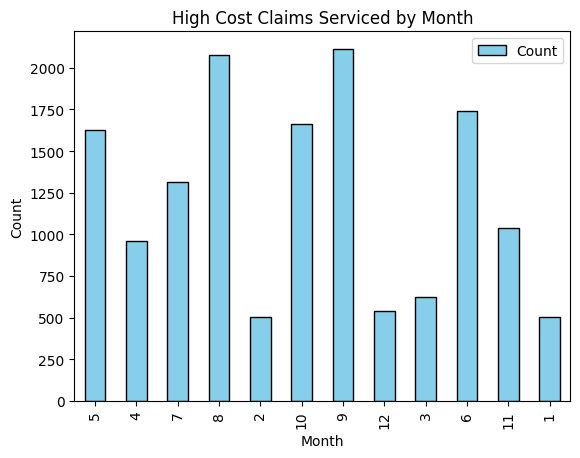

In [317]:
month_counts_pd = month_counts.to_pandas()

month_counts_pd.plot(kind="bar", x="Month", y="Count", color='skyblue', edgecolor='black')
plt.title("High Cost Claims Serviced by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show() 

In [318]:
weekday_counts = df.filter(df['High Cost Claim'] == 1).with_columns(
    pl.col("Service Date").dt.weekday().alias("Weekday")
)
weekday_counts = weekday_counts.group_by("Weekday").agg(pl.len().alias("Weekday Count"))


In [319]:
weekday_counts

Weekday,Weekday Count
i8,u32
6,1970
4,2497
5,1780
2,1996
1,2148
7,1947
3,2360


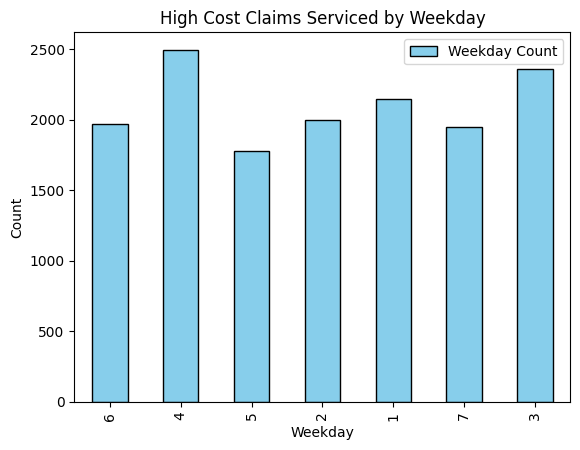

In [320]:
weekday_counts_pd = weekday_counts.to_pandas()

weekday_counts_pd.plot(kind="bar", x="Weekday", y="Weekday Count", color='skyblue', edgecolor='black')
plt.title("High Cost Claims Serviced by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show() 